# Distribuição de Sentimentos

Este notebook faz o plot dos sentimentos nos reviews classificados, cruzando distribução de sentimentos com score atribuído pelo usuário.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
df_predictions = pd.read_csv('/content/drive/MyDrive/predicoes_reviews_b3.csv')

In [17]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 955 entries, 0 to 954
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review          955 non-null    object
 1   Classe Real     955 non-null    int64 
 2   Classe Predita  955 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.5+ KB


In [19]:
# Cria o mapeamento inverso
id2label = {
    0: "Confiança/Orgulho",
    1: "Confusão",
    2: "Desejo",
    3: "Frustração/Descontentamento",
    4: "Interesse/Sugestão",
    5: "Medo/Ansiedade",
    6: "Neutro",
    7: "Satisfação"
}

# Adiciona as duas colunas no dataframe
df_predictions["Label"] = df_predictions["Classe Predita"]  # O número da classe
df_predictions["Sentimento"] = df_predictions["Classe Predita"].map(id2label)

# Exibir as primeiras linhas para conferir
df_predictions.head()


,Review,Classe Real,Classe Predita,Label,Sentimento
0,Muito bom,7,7,7,Satisfação
1,o melhor de todos ótimo,7,7,7,Satisfação
2,Pior aplicativo de banco que existe!!!,3,3,3,Frustração/Descontentamento
3,Perfeito! 👍🏻👍🏻,7,7,7,Satisfação
4,Muito prático,7,7,7,Satisfação


In [20]:
df_predictions.to_csv('classificacao_com_legenda.csv', index=False)

In [21]:
df_analise = pd.read_csv('df_bancos_todos_subamostrado_2.csv')

In [22]:
df_analise

,Data,Score,Review,Classificacao_sabia_filtrada,Banco,Classificacao_sabia_agrupada,Review_Sem_Emojis,Classificacao_Sabia_Agrupada_2,Classificacao_Sabia_Agrupada_3
0,2024-08-12 15:49:49,5,É um Banco com total segurança,Confiança,Sicredi,Confiança,É um Banco com total segurança,Confiança/Orgulho,Confiança/Orgulho
1,2023-12-22 12:20:30,5,Felis assim tranquilidade e confiança a muinto...,Confiança,Banrisul,Confiança,Felis assim tranquilidade e confiança a muinto...,Confiança/Orgulho,Confiança/Orgulho
2,2023-07-06 23:26:36,5,Gosto muito e me sinto bastante seguro usando ...,Confiança,Safra,Confiança,Gosto muito e me sinto bastante seguro usando ...,Confiança/Orgulho,Confiança/Orgulho
3,2024-07-08 14:37:46,5,Rápido e seguro,Confiança,BTG Banking,Confiança,Rápido e seguro,Confiança/Orgulho,Confiança/Orgulho
4,2024-08-09 00:22:30,5,Rapidinho Confiável Seguro,Confiança,Sicredi,Confiança,Rapidinho Confiável Seguro,Confiança/Orgulho,Confiança/Orgulho
...,...,...,...,...,...,...,...,...,...
3047,2024-08-19 10:42:59,5,bom 👍,Apreciação,Banco do Brasil,Apreciação,bom,Apreciação,Satisfação
3048,2024-08-12 13:22:53,5,Funcional Sem complicações.,Contentamento,Sicredi,Satisfação,Funcional Sem complicações.,Satisfação,Satisfação
3049,2024-08-02 16:22:16,5,ótimo,Apreciação,Sicoob,Apreciação,ótimo,Apreciação,Satisfação
3050,2024-08-12 18:50:23,5,está bom,Contentamento,Santander,Satisfação,está bom,Satisfação,Satisfação


In [23]:
# Contar a frequência de incidência por Score e por Classificação
frequencia = df_analise.groupby(["Score", "Classificacao_Sabia_Agrupada_3"]).size().unstack(fill_value=0)

# Mostrar o resultado
display(frequencia)

Classificacao_Sabia_Agrupada_3,Confiança/Orgulho,Confusão,Desejo,Frustração/Descontentamento,Interesse/Sugestão,Medo/Ansiedade,Neutro,Satisfação
Score,,,,,,,,
1,0,155,6,733,2,119,11,3
2,0,44,5,133,4,41,3,2
3,2,71,9,71,6,25,6,8
4,1,81,10,30,7,24,6,64
5,47,188,41,33,8,44,86,923


In [25]:
# Contar a frequência
frequencia = df_analise.groupby(["Score", "Classificacao_Sabia_Agrupada_3"]).size().unstack(fill_value=0)

# Converter para percentual por linha (por Score)
frequencia_percentual = frequencia.div(frequencia.sum(axis=1), axis=0) * 100

# Mostrar o resultado
display(frequencia_percentual.round(2))

Classificacao_Sabia_Agrupada_3,Confiança/Orgulho,Confusão,Desejo,Frustração/Descontentamento,Interesse/Sugestão,Medo/Ansiedade,Neutro,Satisfação
Score,,,,,,,,
1,0.00,15.06,0.58,71.23,0.19,11.56,1.07,0.29
2,0.00,18.97,2.16,57.33,1.72,17.67,1.29,0.86
3,1.01,35.86,4.55,35.86,3.03,12.63,3.03,4.04
4,0.45,36.32,4.48,13.45,3.14,10.76,2.69,28.70
5,3.43,13.72,2.99,2.41,0.58,3.21,6.28,67.37


# Gráfico com matplotlib

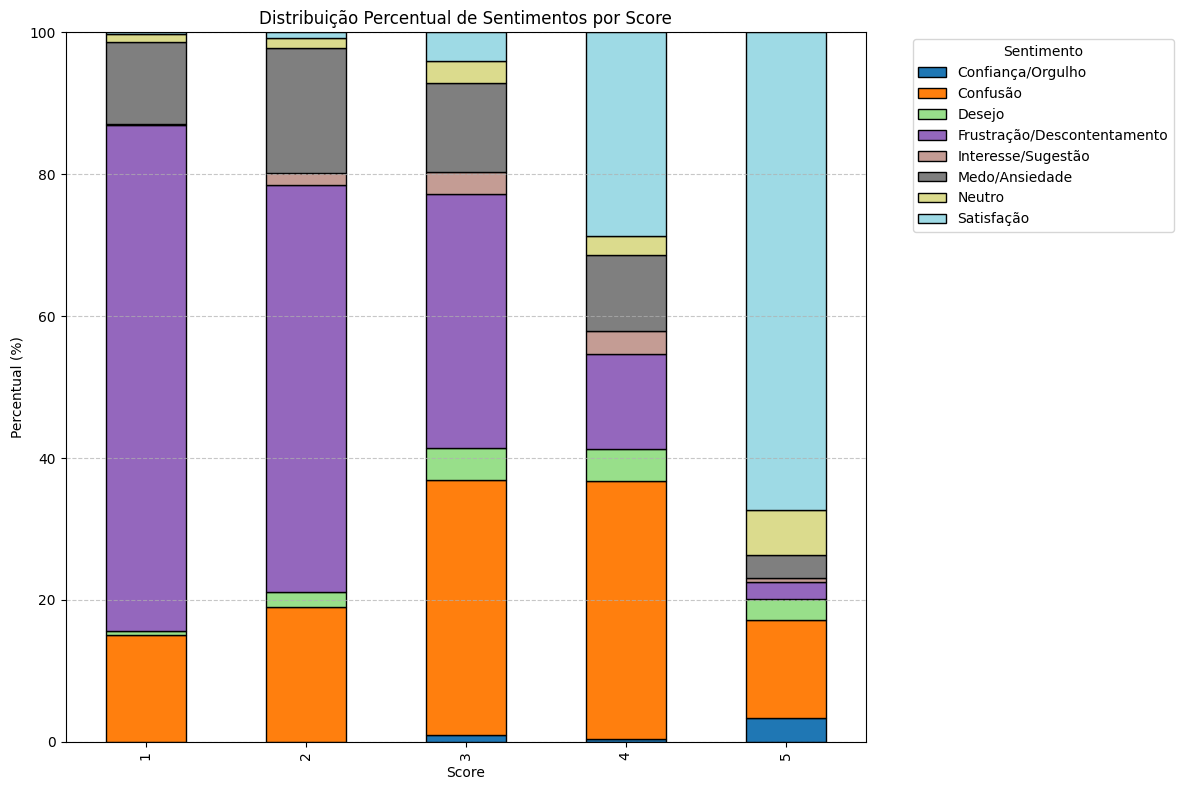

In [56]:
# Contar a frequência
frequencia = df_analise.groupby(["Score", "Classificacao_Sabia_Agrupada_3"]).size().unstack(fill_value=0)

# Converter para percentual por linha (por Score)
frequencia_percentual = frequencia.div(frequencia.sum(axis=1), axis=0) * 100

# Plotar o gráfico de barras empilhadas
ax = frequencia_percentual.plot(kind="bar", stacked=True, figsize=(12,8), colormap="tab20", edgecolor="black")

# Melhorar o layout
plt.title("Distribuição Percentual de Sentimentos por Score")
plt.xlabel("Score")
plt.ylabel("Percentual (%)")
plt.legend(title="Sentimento", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# 5. Mostrar
plt.tight_layout()
plt.savefig("distribuicao_percentual_sentimentos_por_score.png")
plt.show()


# Gráfico com Seaborn

<ipython-input-43-182b672d1577>:21: UserWarning: The palette list has more values (10) than needed (8), which may not be intended.
  sns.barplot(


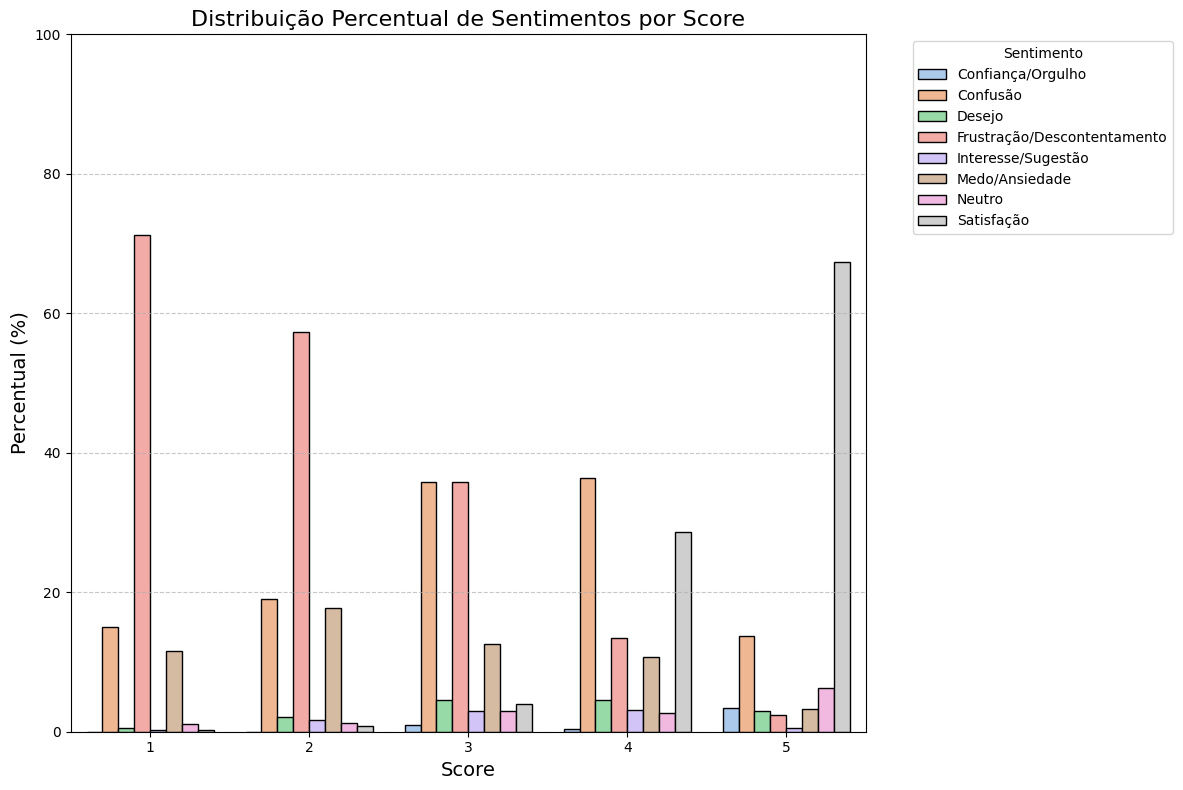

In [43]:
# Contar a frequência
frequencia = df_analise.groupby(["Score", "Classificacao_Sabia_Agrupada_3"]).size().unstack(fill_value=0)

# Converter para percentual por linha (por Score)
frequencia_percentual = frequencia.div(frequencia.sum(axis=1), axis=0) * 100

# Resetar o índice para o Seaborn funcionar
frequencia_percentual = frequencia_percentual.reset_index()

# Transformar o DataFrame para o formato "long" (melted) para Seaborn
frequencia_melted = frequencia_percentual.melt(id_vars="Score", var_name="Sentimento", value_name="Percentual")

# Definir a paleta de cores
palette = sns.color_palette("pastel")

# Criar o gráfico de barras empilhadas
plt.figure(figsize=(12,8))
sns.barplot(
    data=frequencia_melted,
    x="Score",
    y="Percentual",
    hue="Sentimento",
    palette=palette,
    edgecolor="black"
)

# 7. Melhorar o layout
plt.title("Distribuição Percentual de Sentimentos por Score", fontsize=16)
plt.xlabel("Score", fontsize=14)
plt.ylabel("Percentual (%)", fontsize=14)
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Sentimento", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()

# 8. Mostrar o gráfico
plt.show()
